In [36]:
import os
import csv
import networkx as nx
import re

def read_java_files(directory):
    java_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".java"):
                java_files.append(os.path.join(root, file))
    return java_files

def tokenize_java_file(java_file):
    with open(java_file, 'r') as file:
        content = file.read()
        # Tokenize based on spaces, punctuation, etc.
        tokens = re.findall(r"[\w']+|[.,!?;]", content)
        return tokens

def save_tokens_to_csv(tokens, class_name):
    with open(f"tokens/{class_name}.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(tokens)

def build_graph(directory):
    graph = nx.Graph()
    java_files = read_java_files(directory)
    for java_file in java_files:
        tokens = tokenize_java_file(java_file)
        class_name = os.path.splitext(os.path.basename(java_file))[0]
        save_tokens_to_csv(tokens, class_name)
        class_nodes = [token for token in tokens if token[0].isupper() and token.isidentifier()]
        for class_node in class_nodes:
            if not graph.has_node(class_node):
                graph.add_node(class_node)
            graph.add_edge(class_name, class_node)
    return graph

def visualize_graph(graph):
    import matplotlib.pyplot as plt
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=15, edge_color='k', linewidths=1, font_size=1)
    plt.show()

Graph nodes: ['SpringApplication', 'TubeMinerApplication', 'SpringBootApplication', 'IOException', 'GeneralSecurityException', 'String', 'BaseEntity', 'SearchTerm', 'SuperBuilder', 'SQLDelete', 'Where', 'Data', 'NoArgsConstructor', 'AllArgsConstructor', 'Entity', 'Table', 'UniqueConstraint', 'UPDATE', 'SET', 'WHERE', 'ToString', 'EqualsAndHashCode', 'Id', 'GeneratedValue', 'GenerationType', 'SEQUENCE', 'Column', 'Builder', 'Default', 'Boolean', 'FALSE', 'IBaseRepository', 'ISearchTermRepository', 'Repository', 'List', 'BaseService', 'SearchTermService', 'Autowired', 'Service', 'KindEnum', 'YOUTUBE_SEARCH_LIST', 'YOUTUBE_VIDEO_LIST', 'YOUTUBE_VIDEO', 'KIND_NULL_CHECK_CONSTRAINT', 'VARCHAR', 'CHECK', 'IN', 'KindService', 'IKindRepository', 'Kind', 'ContentTypeEnum', 'AUTO', 'CONTENT_TYPE_NULL_CHECK_CONSTRAINT', 'Enumerated', 'EnumType', 'STRING', 'ApiKeyService', 'ReportService', 'MissionControl', 'MissionControlService', 'TagService', 'VideoService', 'TopicService', 'YouTubeSearchListPa

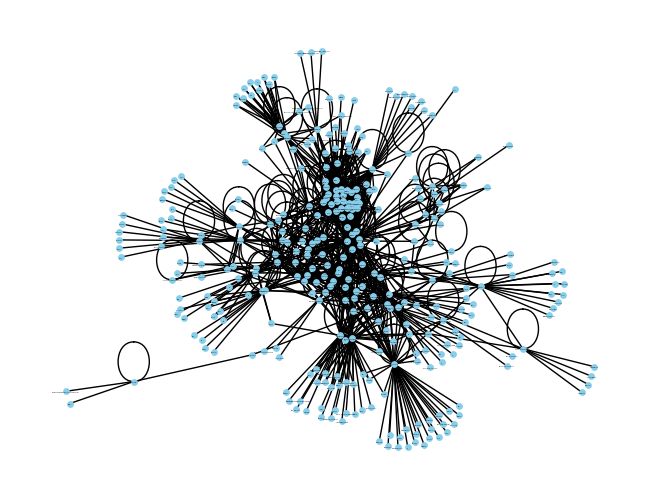

In [37]:
directory = "src/"
graph = build_graph(directory)
print("Graph nodes:", graph.nodes())
print("Graph edges:", graph.edges())
visualize_graph(graph)

In [38]:
import json

def convert_to_d3_json(graph, filename):
    d3_graph = {"nodes": [], "links": []}

    # Adiciona os nós ao JSON
    for node in graph.nodes:
        d3_node = {"id": node}
        d3_graph["nodes"].append(d3_node)

    # Adiciona as arestas ao JSON
    for edge in graph.edges:
        source, target = edge
        d3_link = {"source": source, "target": target}
        d3_graph["links"].append(d3_link)

    # Salva o JSON em um arquivo
    with open(filename, 'w') as f:
        json.dump(d3_graph, f, indent=4)

    print(f"Grafo convertido para JSON e salvo como '{filename}'.")

convert_to_d3_json(graph, 'graph.json')

Grafo convertido para JSON e salvo como 'graph.json'.
